# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [82]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [84]:
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H
376,20180513,Southampton,Man City,0,1,A
377,20180513,Swansea,Stoke,1,2,A
378,20180513,Tottenham,Leicester,5,4,H


In [85]:
EPL18.head(n=20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
5,20170812,Southampton,Swansea,0,0,D
6,20170812,Watford,Liverpool,3,3,D
7,20170812,West Brom,Bournemouth,1,0,H
8,20170813,Man United,West Ham,4,0,H
9,20170813,Newcastle,Tottenham,0,2,A


## Step 2

In [86]:
EPL18['hw'] = np.where(EPL18['FTHG'] > EPL18 ['FTAG'],1,np.where(EPL18['FTHG'] == EPL18['FTAG'],0.5,0))
EPL18['aw'] = np.where(EPL18['FTHG'] < EPL18 ['FTAG'],1,np.where(EPL18['FTHG'] == EPL18['FTAG'],0.5,0))
EPL18['count'] = 1
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hw,aw,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H,1.0,0.0,1
376,20180513,Southampton,Man City,0,1,A,0.0,1.0,1
377,20180513,Swansea,Stoke,1,2,A,0.0,1.0,1
378,20180513,Tottenham,Leicester,5,4,H,1.0,0.0,1


In [87]:
EPL18.head(n=20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hw,aw,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
5,20170812,Southampton,Swansea,0,0,D,0.5,0.5,1
6,20170812,Watford,Liverpool,3,3,D,0.5,0.5,1
7,20170812,West Brom,Bournemouth,1,0,H,1.0,0.0,1
8,20170813,Man United,West Ham,4,0,H,1.0,0.0,1
9,20170813,Newcastle,Tottenham,0,2,A,0.0,1.0,1


## Step 3

In [88]:
games2017 = EPL18[EPL18['Date'] < 20180000]
games2017

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hw,aw,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
204,20171230,Man United,Southampton,0,0,D,0.5,0.5,1
205,20171230,Newcastle,Brighton,0,0,D,0.5,0.5,1
206,20171230,Watford,Swansea,1,2,A,0.0,1.0,1
207,20171231,Crystal Palace,Man City,0,0,D,0.5,0.5,1


In [89]:
games2017[games2017['AwayTeam'] == 'Arsenal']

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hw,aw,count
15,20170819,Stoke,Arsenal,1,0,H,1.0,0.0,1
27,20170827,Liverpool,Arsenal,4,0,H,1.0,0.0,1
48,20170917,Chelsea,Arsenal,0,0,D,0.5,0.5,1
76,20171014,Watford,Arsenal,2,1,H,1.0,0.0,1
88,20171022,Everton,Arsenal,2,5,A,0.0,1.0,1
108,20171105,Man City,Arsenal,3,1,H,1.0,0.0,1
127,20171126,Burnley,Arsenal,0,1,A,0.0,1.0,1
159,20171210,Southampton,Arsenal,1,1,D,0.5,0.5,1
169,20171213,West Ham,Arsenal,0,0,D,0.5,0.5,1
199,20171228,Crystal Palace,Arsenal,2,3,A,0.0,1.0,1


In [90]:
games2018 = EPL18[EPL18['Date'] > 20180000]
games2018

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hw,aw,count
209,20180101,Brighton,Bournemouth,2,2,D,0.5,0.5,1
210,20180101,Burnley,Liverpool,1,2,A,0.0,1.0,1
211,20180101,Everton,Man United,0,2,A,0.0,1.0,1
212,20180101,Leicester,Huddersfield,3,0,H,1.0,0.0,1
213,20180101,Stoke,Newcastle,0,1,A,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H,1.0,0.0,1
376,20180513,Southampton,Man City,0,1,A,0.0,1.0,1
377,20180513,Swansea,Stoke,1,2,A,0.0,1.0,1
378,20180513,Tottenham,Leicester,5,4,H,1.0,0.0,1


In [91]:
home_teams = games2017.groupby('HomeTeam')['hw','FTHG','FTAG','count'].sum().reset_index()
home_teams = home_teams.rename(columns = {'HomeTeam':'team','FTHG':'goals_for','FTAG':'goals_against','count':'games'})
home_teams

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_46883/848918995.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home_teams = games2017.groupby('HomeTeam')['hw','FTHG','FTAG','count'].sum().reset_index()


,team,hw,goals_for,goals_against,games
0,Arsenal,8.5,25,10,10
1,Bournemouth,4.5,14,17,11
2,Brighton,5.5,10,12,10
3,Burnley,6.0,7,6,10
4,Chelsea,8.5,21,7,11
5,Crystal Palace,5.0,14,18,11
6,Everton,6.5,17,13,10
7,Huddersfield,6.0,10,12,11
8,Leicester,5.0,13,14,10
9,Liverpool,8.5,21,4,11


In [92]:
ht2018 = games2018.groupby('HomeTeam')['hw','FTHG', 'FTAG', 'count'].sum().reset_index()
ht2018 = ht2018.rename(columns={'HomeTeam':'team','FTHG':'goals_for','FTAG':'goals_against','count':'games'})

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_46883/2231289718.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ht2018 = games2018.groupby('HomeTeam')['hw','FTHG', 'FTAG', 'count'].sum().reset_index()


In [93]:
away_teams = games2017.groupby('AwayTeam')['aw','FTHG','FTAG','count'].sum().reset_index()
away_teams = away_teams.rename(columns = {'AwayTeam':'team','FTAG':'goals_for','FTHG':'goals_against','count':'games'})
away_teams

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_46883/2619387618.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away_teams = games2017.groupby('AwayTeam')['aw','FTHG','FTAG','count'].sum().reset_index()


,team,aw,goals_against,goals_for,games
0,Arsenal,5.0,16,13,11
1,Bournemouth,3.0,15,6,10
2,Brighton,3.0,13,5,11
3,Burnley,6.5,11,11,11
4,Chelsea,7.0,7,18,10
5,Crystal Palace,2.5,14,4,10
6,Everton,3.5,19,8,11
7,Huddersfield,3.0,20,8,10
8,Leicester,5.0,18,18,11
9,Liverpool,6.5,20,27,10


In [94]:
at2018 = games2018.groupby('AwayTeam')['aw','FTHG', 'FTAG', 'count'].sum().reset_index()
at2018 = at2018.rename(columns={'AwayTeam':'team','FTAG':'goals_for','FTHG':'goals_against','count':'games'})

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_46883/1973200195.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  at2018 = games2018.groupby('AwayTeam')['aw','FTHG', 'FTAG', 'count'].sum().reset_index()


## Step 4 (home team)

In [95]:
all2017games = pd.merge(home_teams, away_teams, on='team')
all2017games

,team,hw,goals_for_x,goals_against_x,games_x,aw,goals_against_y,goals_for_y,games_y
0,Arsenal,8.5,25,10,10,5.0,16,13,11
1,Bournemouth,4.5,14,17,11,3.0,15,6,10
2,Brighton,5.5,10,12,10,3.0,13,5,11
3,Burnley,6.0,7,6,10,6.5,11,11,11
4,Chelsea,8.5,21,7,11,7.0,7,18,10
5,Crystal Palace,5.0,14,18,11,2.5,14,4,10
6,Everton,6.5,17,13,10,3.5,19,8,11
7,Huddersfield,6.0,10,12,11,3.0,20,8,10
8,Leicester,5.0,13,14,10,5.0,18,18,11
9,Liverpool,8.5,21,4,11,6.5,20,27,10


In [96]:
all2018games = pd.merge(ht2018,at2018, on='team')
all2018games

,team,hw,goals_for_x,goals_against_x,games_x,aw,goals_against_y,goals_for_y,games_y
0,Arsenal,7.5,29,10,9,1.0,15,7,8
1,Bournemouth,5.0,12,13,8,4.0,16,13,9
2,Brighton,5.5,14,13,9,1.5,16,5,8
3,Burnley,3.5,9,11,9,4.0,11,9,8
4,Chelsea,4.5,9,9,8,4.5,15,14,9
5,Crystal Palace,4.5,15,9,8,4.5,14,12,9
6,Everton,5.5,11,9,9,2.5,17,8,8
7,Huddersfield,2.5,6,13,8,2.5,13,4,9
8,Leicester,5.0,12,8,9,2.5,20,13,8
9,Liverpool,7.0,24,6,8,5.0,8,12,9


## Step 5 (home team)

In [97]:
all2017games['w'] = all2017games['hw'] + all2017games['aw']
all2017games['goals_for'] = all2017games['goals_for_x'] + all2017games['goals_for_y']
all2017games['goals_against'] = all2017games['goals_against_x'] + all2017games['goals_against_y']
all2017games['total_games'] = all2017games['games_x'] + all2017games['games_y']

all2018games['w'] = all2018games['hw'] + all2018games['aw']
all2018games['goals_for'] = all2018games['goals_for_x'] + all2018games['goals_for_y']
all2018games['goals_against'] = all2018games['goals_against_x'] + all2018games['goals_against_y']
all2018games['total_games'] = all2018games['games_x'] + all2018games['games_y']

EPL17 = all2017games[['team','w','goals_for','goals_against','total_games']]
EPL2018 = all2018games[['team','w','goals_for','goals_against','total_games']]
EPL17

,team,w,goals_for,goals_against,total_games
0,Arsenal,13.5,38,26,21
1,Bournemouth,7.5,20,32,21
2,Brighton,8.5,15,25,21
3,Burnley,12.5,18,17,21
4,Chelsea,15.5,39,14,21
5,Crystal Palace,7.5,18,32,21
6,Everton,10.0,25,32,21
7,Huddersfield,9.0,18,32,21
8,Leicester,10.0,31,32,21
9,Liverpool,15.0,48,24,21


## Step 6 (home team)

In [98]:
EPL17['wpc17'] = EPL17['w'] / EPL17['total_games']
EPL17['pyth17'] = (EPL17['goals_for']**2) / (EPL17['goals_for']**2 + EPL17['goals_against']**2)
EPL17

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_46883/2742134348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL17['wpc17'] = EPL17['w'] / EPL17['total_games']
/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_46883/2742134348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL17['pyth17'] = (EPL17['goals_for']**2) / (EPL17['goals_for']**2 + EPL17['goals_against']**2)


,team,w,goals_for,goals_against,total_games,wpc17,pyth17
0,Arsenal,13.5,38,26,21,0.642857,0.681132
1,Bournemouth,7.5,20,32,21,0.357143,0.280899
2,Brighton,8.5,15,25,21,0.404762,0.264706
3,Burnley,12.5,18,17,21,0.595238,0.528548
4,Chelsea,15.5,39,14,21,0.738095,0.885847
5,Crystal Palace,7.5,18,32,21,0.357143,0.240356
6,Everton,10.0,25,32,21,0.476190,0.379018
7,Huddersfield,9.0,18,32,21,0.428571,0.240356
8,Leicester,10.0,31,32,21,0.476190,0.484131
9,Liverpool,15.0,48,24,21,0.714286,0.800000


## Optional steps, not required for Assessment 
### (Uncomment to run)

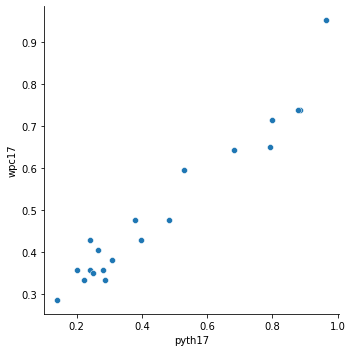

In [99]:
# Plot the data

sns.relplot(x="pyth17", y="wpc17", data =EPL17)

In [100]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           2.81e-12
Time:                        16:36:56   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth17         0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

## Step 7 (=Step 5 (away team))

## Step 7 (=Step 6 (away team))

In [101]:
EPL2018['wpc18'] = EPL2018['w'] / EPL2018['total_games']
EPL2018['pyth18'] = EPL2018['goals_for']**2 / (EPL2018['goals_for']**2 + EPL2018['goals_against']**2)

/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_46883/2471578113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL2018['wpc18'] = EPL2018['w'] / EPL2018['total_games']
/var/folders/dl/p7yynvfx1t71gxy40qg64jqr0000gn/T/ipykernel_46883/2471578113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL2018['pyth18'] = EPL2018['goals_for']**2 / (EPL2018['goals_for']**2 + EPL2018['goals_against']**2)


## Optional steps, not required for Assessment
### (Uncomment to run)

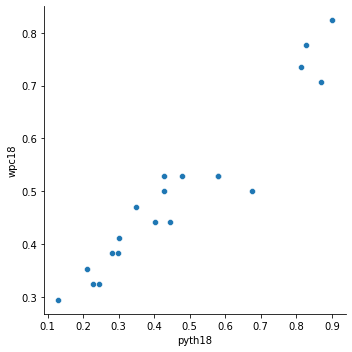

In [102]:
# Plot the data

sns.relplot(x="pyth18", y="wpc18", data =EPL2018)

In [103]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL2018).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           5.02e-11
Time:                        16:36:56   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth18         0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [104]:
all2018games

,team,hw,goals_for_x,goals_against_x,games_x,aw,goals_against_y,goals_for_y,games_y,w,goals_for,goals_against,total_games
0,Arsenal,7.5,29,10,9,1.0,15,7,8,8.5,36,25,17
1,Bournemouth,5.0,12,13,8,4.0,16,13,9,9.0,25,29,17
2,Brighton,5.5,14,13,9,1.5,16,5,8,7.0,19,29,17
3,Burnley,3.5,9,11,9,4.0,11,9,8,7.5,18,22,17
4,Chelsea,4.5,9,9,8,4.5,15,14,9,9.0,23,24,17
5,Crystal Palace,4.5,15,9,8,4.5,14,12,9,9.0,27,23,17
6,Everton,5.5,11,9,9,2.5,17,8,8,8.0,19,26,17
7,Huddersfield,2.5,6,13,8,2.5,13,4,9,5.0,10,26,17
8,Leicester,5.0,12,8,9,2.5,20,13,8,7.5,25,28,17
9,Liverpool,7.0,24,6,8,5.0,8,12,9,12.0,36,14,17


## Step 9

In [105]:
Half2predictor = pd.merge(EPL17,EPL2018, on='team')
Half2predictor

,team,w_x,goals_for_x,goals_against_x,total_games_x,wpc17,pyth17,w_y,goals_for_y,goals_against_y,total_games_y,wpc18,pyth18
0,Arsenal,13.5,38,26,21,0.642857,0.681132,8.5,36,25,17,0.500000,0.674649
1,Bournemouth,7.5,20,32,21,0.357143,0.280899,9.0,25,29,17,0.529412,0.426330
2,Brighton,8.5,15,25,21,0.404762,0.264706,7.0,19,29,17,0.411765,0.300333
3,Burnley,12.5,18,17,21,0.595238,0.528548,7.5,18,22,17,0.441176,0.400990
4,Chelsea,15.5,39,14,21,0.738095,0.885847,9.0,23,24,17,0.529412,0.478733
5,Crystal Palace,7.5,18,32,21,0.357143,0.240356,9.0,27,23,17,0.529412,0.579491
6,Everton,10.0,25,32,21,0.476190,0.379018,8.0,19,26,17,0.470588,0.348120
7,Huddersfield,9.0,18,32,21,0.428571,0.240356,5.0,10,26,17,0.294118,0.128866
8,Leicester,10.0,31,32,21,0.476190,0.484131,7.5,25,28,17,0.441176,0.443577
9,Liverpool,15.0,48,24,21,0.714286,0.800000,12.0,36,14,17,0.705882,0.868633


In [106]:
keyvars = Half2predictor[['team','wpc17','wpc18','pyth17','pyth18']]
keyvars.corr()

,wpc17,wpc18,pyth17,pyth18
wpc17,1.000000,0.756573,0.968204,0.745832
wpc18,0.756573,1.000000,0.795693,0.955986
pyth17,0.968204,0.795693,1.000000,0.795331
pyth18,0.745832,0.955986,0.795331,1.000000


## Optional steps, not required for Assessment
### (Uncomment to run)

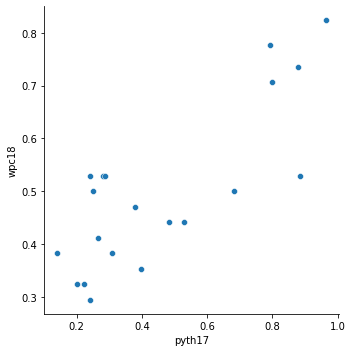

In [107]:
sns.relplot(x="pyth17", y="wpc18", data =Half2predictor)

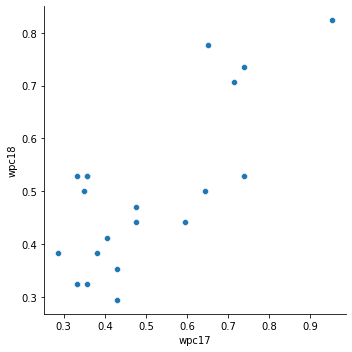

In [108]:
sns.relplot(x="wpc17", y="wpc18", data =Half2predictor)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?